# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [ ]:
# Import the functions we need
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library

In [ ]:
# Initialize a model
model = PCA()

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# Check data types
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(penguins.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [ ]:
# Descriptive statistics
penguins.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

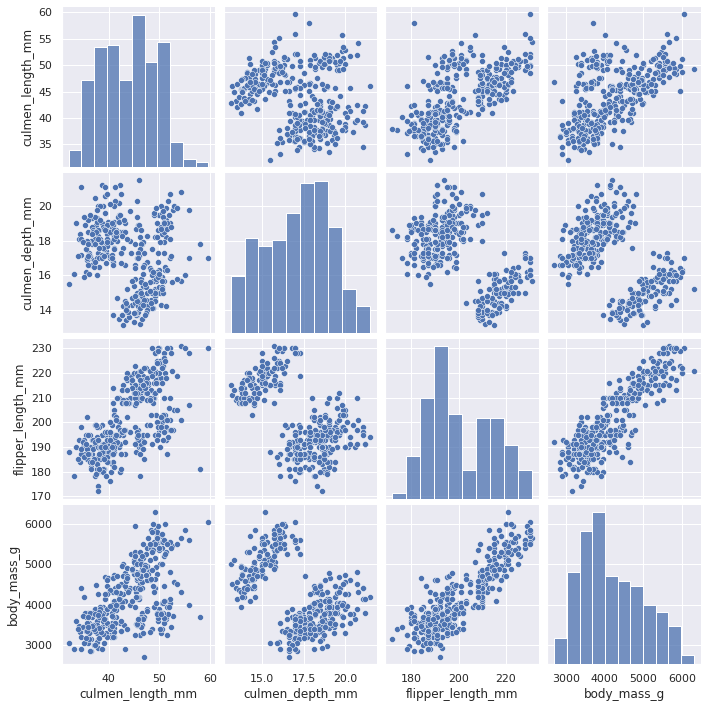

In [ ]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(penguins) # , hue='species'

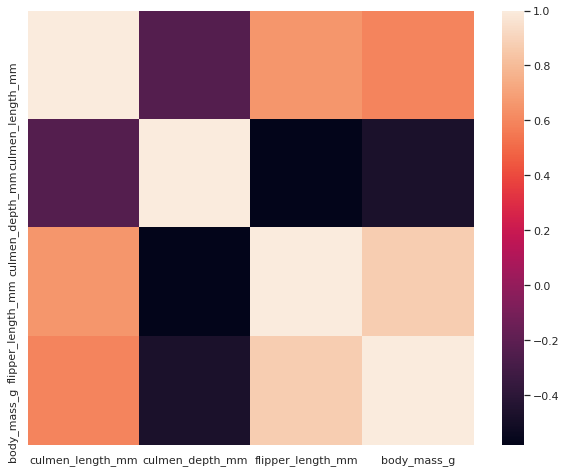

In [ ]:
# And lastly, a correlation plot
sns.heatmap(penguins.corr())

### Preprocessing

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
penguins.set_index(['species_short', 'island', 'sex'], inplace=True)
#penguins.reset_index(0, inplace=False)

In [ ]:
penguins.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(penguins.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(penguins_scaled, columns=penguins.columns).describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count           342.000          342.000            342.000      342.000
mean             -0.000           -0.000              0.000        0.000
std               1.001            1.001              1.001        1.001
min              -2.169           -2.054             -2.059       -1.875
25%              -0.862           -0.787             -0.777       -0.814
50%               0.097            0.075             -0.279       -0.190
75%               0.840            0.785              0.861        0.685
max               2.876            2.205              2.143        2.620

### Executingh PCA

In [ ]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fitr the model
model.fit(penguins_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fit and transform the data
penguins_reduced = model.transform(penguins_scaled)

### Inspecting Results

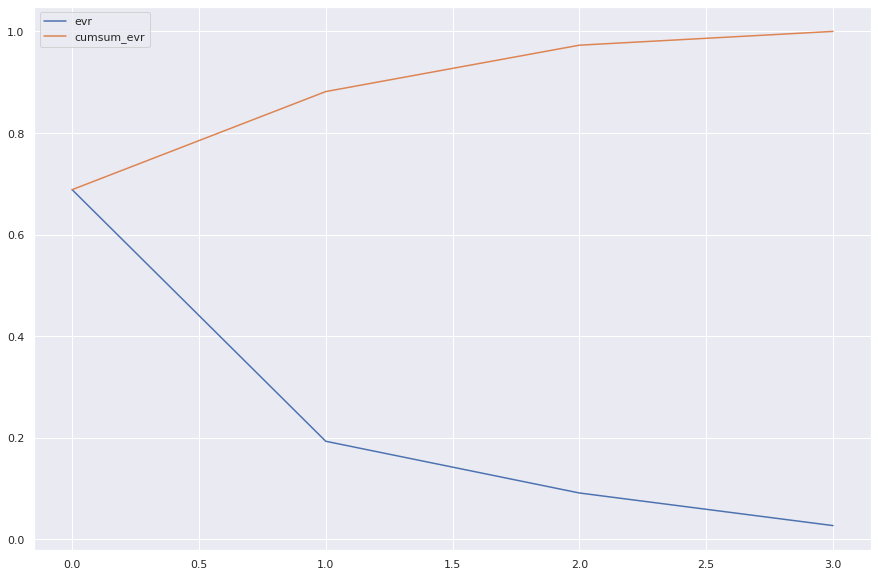

In [ ]:
plot_penguins = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_penguins.values, x = plot_penguins.index.get_level_values(0), hue=plot_penguins.index.get_level_values(1))

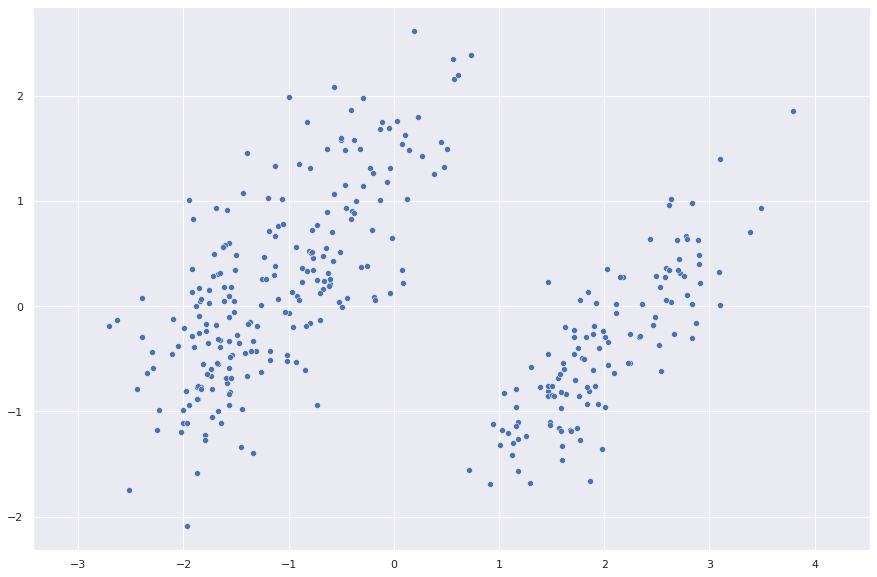

In [ ]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = penguins_reduced[:,0], y = penguins_reduced[:,1])
plt.axis('equal')
plt.show()

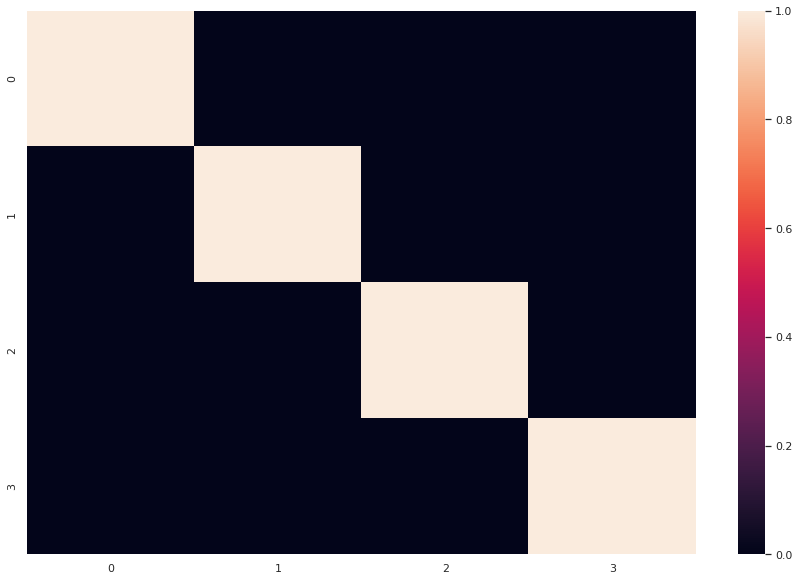

In [ ]:
# Correlation of the components
sns.heatmap(pd.DataFrame(penguins_reduced).corr())

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
# Your solutions from here...

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# Check data types
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(penguins.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [ ]:
# Select the (independant) features that we are going to use to train the model
X = penguins.loc[:,'sex':'culmen_length_mm']

In [ ]:
# Define the dependant variabel / target to predict (species)
y = penguins.species_short

## Transforming, preprocessing and splitting

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [ ]:
 penguins.dropna()

species_short     island  ...  body_mass_g     sex
0          Adelie  Torgersen  ...       -0.564    MALE
1          Adelie  Torgersen  ...       -0.502  FEMALE
2          Adelie  Torgersen  ...       -1.189  FEMALE
4          Adelie  Torgersen  ...       -0.939  FEMALE
5          Adelie  Torgersen  ...       -0.689    MALE
..            ...        ...  ...          ...     ...
338        Gentoo     Biscoe  ...        0.903  FEMALE
340        Gentoo     Biscoe  ...        0.810  FEMALE
341        Gentoo     Biscoe  ...        1.933    MALE
342        Gentoo     Biscoe  ...        1.247  FEMALE
343        Gentoo     Biscoe  ...        1.496    MALE

[334 rows x 7 columns]

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

In [ ]:
# Your solutions from here...

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt


sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
pd.get_dummies

<function pandas.core.reshape.reshape.get_dummies>

In [ ]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data['weekly_hours_worked'] = (data['average_montly_hours'] / 4)
data

satisfaction  evaluation  ...  salary  weekly_hours_worked
0              0.38        0.53  ...     low                39.25
1              0.80        0.86  ...  medium                65.50
2              0.11        0.88  ...  medium                68.00
3              0.72        0.87  ...     low                55.75
4              0.37        0.52  ...     low                39.75
...             ...         ...  ...     ...                  ...
14994          0.40        0.57  ...     low                37.75
14995          0.37        0.48  ...     low                40.00
14996          0.37        0.53  ...     low                35.75
14997          0.11        0.96  ...     low                70.00
14998          0.37        0.52  ...     low                39.50

[14999 rows x 11 columns]

In [ ]:
# Select the (independant) features that we are going to use to train the model
X = data.loc[:, 'time_spend_company':'promotion']

In [ ]:
# Define the dependant variabel / target to predict (salary)
y = data.salary

## Transforming, preprocessing and splitting

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

## Training and evaluating various models

In [ ]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

### LogisticRegression (let's call it that for now without going into details)

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.50375    0.50416667 0.51041667 0.50041667 0.50646103]


In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.5036666666666667


In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

              precision    recall  f1-score   support

        high       0.00      0.00      0.00       253
         low       0.51      0.82      0.63      1474
      medium       0.47      0.24      0.32      1273

    accuracy                           0.50      3000
   macro avg       0.33      0.35      0.32      3000
weighted avg       0.45      0.50      0.44      3000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic regression is not doing too well. 

Here the recall score is perhaps more interesting than the precision score.

#### Let's inspect the performance visually

In [ ]:
!pip uninstall -qq mlxtend -y

In [ ]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.4MB 5.8MB/s 


In [ ]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

Logistic regression is not doing too well. 

Here the recall score is perhaps more interesting than the precision score.

#### Let's inspect the performance visually

In [ ]:
!pip uninstall -qq mlxtend -y

In [ ]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

In [ ]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f67a4465470>)

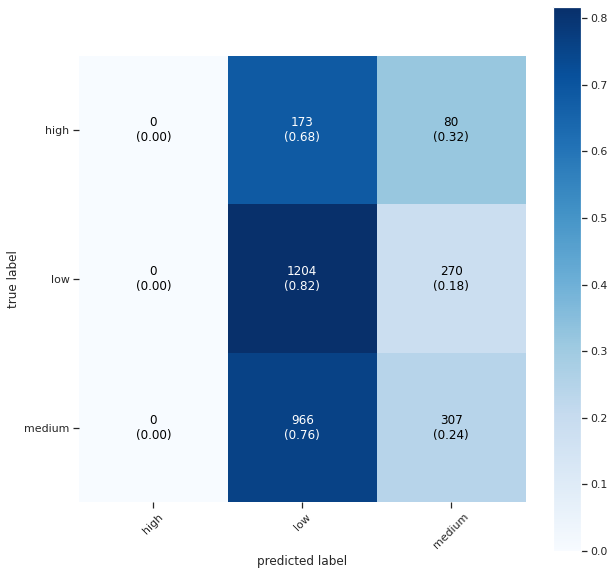

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

### Random Forest
Now we can try out a more complex model (and hopefully more powerfull)
The process is exactly the same and thus there are not too many comments in the code

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.49333333 0.49291667 0.51       0.50208333 0.50854523]


In [ ]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5096666666666667


The test-score is well within the values produced in the crossvalidation
Overall performance goes up (as expected)

In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

        high       1.00      0.02      0.03       253
         low       0.51      0.93      0.66      1474
      medium       0.53      0.12      0.19      1273

    accuracy                           0.51      3000
   macro avg       0.68      0.36      0.29      3000
weighted avg       0.56      0.51      0.41      3000



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f67a22efc18>)

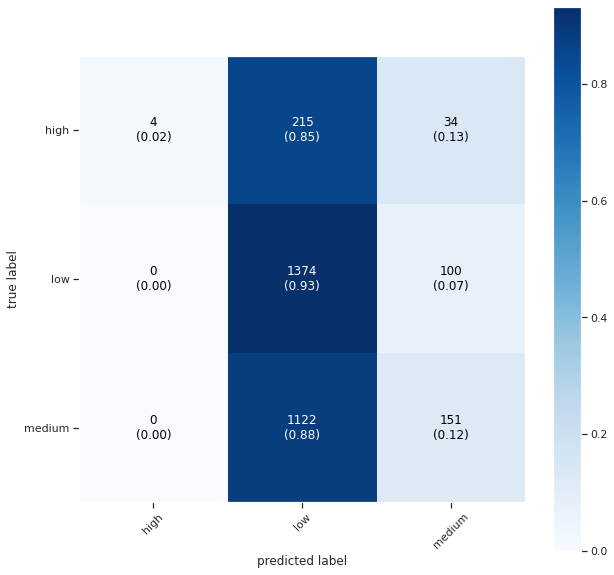

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

### XGBoost
Finally, XGBoost (again we will use standard settings - i.e. no hyperameter tuning)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.49458333 0.50208333 0.51083333 0.50125    0.51229679]
0.5116666666666667


Overall performance is even higher as with Catboost. But let's see how the algorighm is dealing with our problematic small classes

In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

        high       1.00      0.02      0.03       253
         low       0.51      0.94      0.66      1474
      medium       0.55      0.11      0.19      1273

    accuracy                           0.51      3000
   macro avg       0.69      0.36      0.29      3000
weighted avg       0.57      0.51      0.41      3000



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f67a22d39e8>)

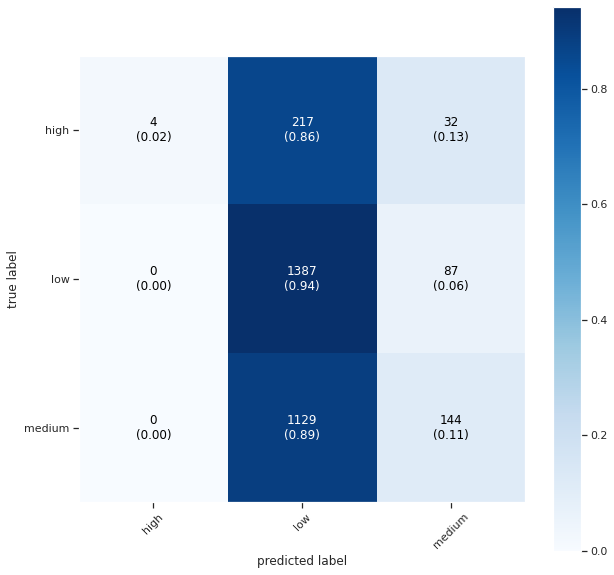

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

Overall, it seems XGBoost wins this time.

This notebook is only a quick example of the machanics of valious algorithms on small data. 
In real-world situations we would need to spend much more time tuning the models. Also: More compelx models do not always perform better...

## Predicting the churn

So far we have considered a classificaion problem - the model had to pick one of the 5 options. The outcome variable was a class. Let's shift gears and look at a different type of problem - a prediction where the outcome is a continuous variable. This is our "typical" regression problem.

In the following we are going to predict the churn. The inputs into the model will be the same that we already used for predicting the salary. We are only going to change the dependant.

In [ ]:
# picking a different outcome variable

y_reg = data.churn

In [ ]:
# We need to creat new train / test splits here - as the nomad_score was not part of the previous split.

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

as you can see, I also have the overall dataframe in the split as a 3rd coponent. This is only for some interactive visuals down the line. But yeah, you can do that too... :-) Sometimes it's also handy when passing in some indices that you want to use to get back to data that would be inaccessible.

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


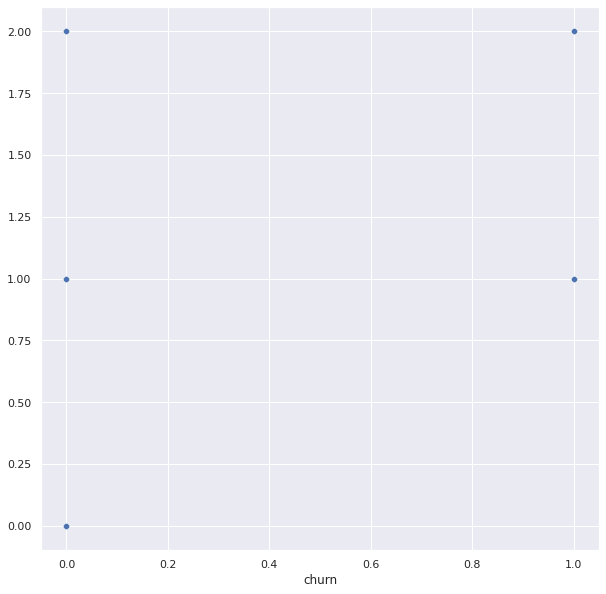

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data['weekly_hours_worked'] = (data['average_montly_hours'] / 4)
data

satisfaction  evaluation  ...  salary  weekly_hours_worked
0              0.38        0.53  ...     low                39.25
1              0.80        0.86  ...  medium                65.50
2              0.11        0.88  ...  medium                68.00
3              0.72        0.87  ...     low                55.75
4              0.37        0.52  ...     low                39.75
...             ...         ...  ...     ...                  ...
14994          0.40        0.57  ...     low                37.75
14995          0.37        0.48  ...     low                40.00
14996          0.37        0.53  ...     low                35.75
14997          0.11        0.96  ...     low                70.00
14998          0.37        0.52  ...     low                39.50

[14999 rows x 11 columns]

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6723 to 14346
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          3000 non-null   float64
 1   evaluation            3000 non-null   float64
 2   number_of_projects    3000 non-null   int64  
 3   average_montly_hours  3000 non-null   int64  
 4   time_spend_company    3000 non-null   int64  
 5   work_accident         3000 non-null   int64  
 6   churn                 3000 non-null   int64  
 7   promotion             3000 non-null   int64  
 8   department            3000 non-null   object 
 9   salary                3000 non-null   object 
 10  weekly_hours_worked   3000 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 281.2+ KB


In [ ]:
data_test['churn_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='churn',
    y='churn_pred',
    color=alt.Color('salary', scale=alt.Scale(scheme='category10')),
    tooltip=['salary','promotion','department']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

In [ ]:
# Import and instantiate a XGBoost Regressor

model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

[09:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.27603084111851417


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


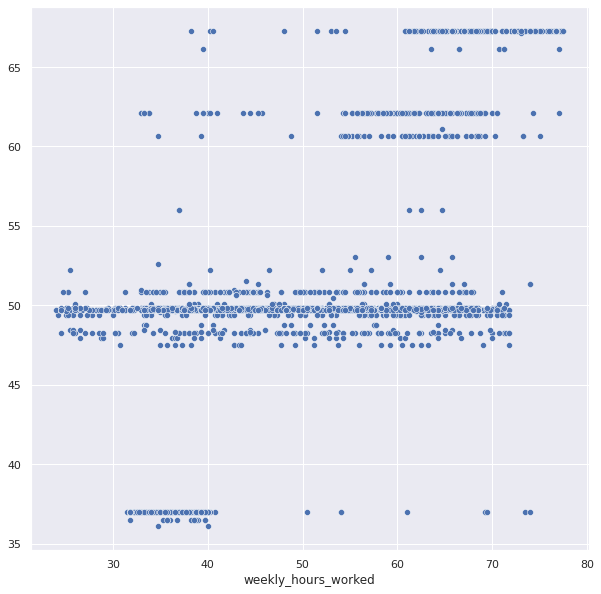

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test['churn_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='churn',
    y='churn_pred',
    color=alt.Color('salary', scale=alt.Scale(scheme='category10')),
    tooltip=['salary','promotion','department']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

## Predicting the number of weekly hours worked

So far we have considered a classificaion problem - the model had to pick one of the 5 options. The outcome variable was a class. Let's shift gears and look at a different type of problem - a prediction where the outcome is a continuous variable. This is our "typical" regression problem.

In the following we are going to predict the number of weekly hours worked
. The inputs into the model will be the same that we already used for predicting the churn. We are only going to change the dependant.

In [ ]:
# picking a different outcome variable

y_reg = data. weekly_hours_worked

In [ ]:
# We need to creat new train / test splits here - as the nomad_score was not part of the previous split.

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

as you can see, I also have the overall dataframe in the split as a 3rd coponent. This is only for some interactive visuals down the line. But yeah, you can do that too... :-) Sometimes it's also handy when passing in some indices that you want to use to get back to data that would be inaccessible.

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

0.012336902269114656


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


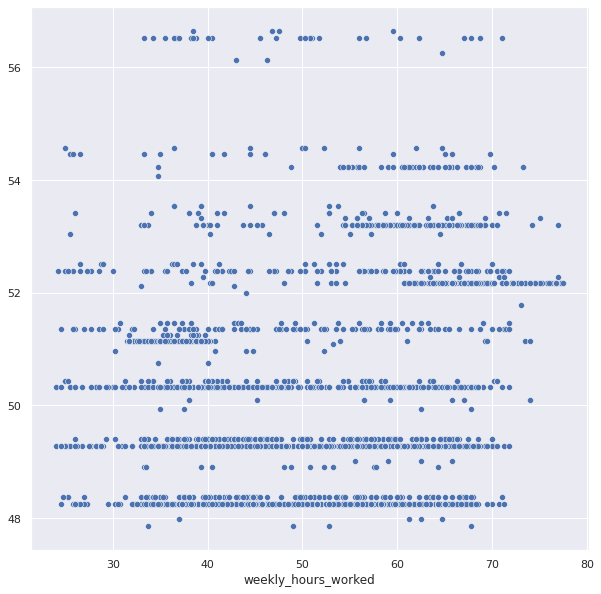

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test['churn_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='churn',
    y='churn_pred',
    color=alt.Color('salary', scale=alt.Scale(scheme='category10')),
    tooltip=['salary','average_montly_hours','department']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

In [ ]:
# Import and instantiate a XGBoost Regressor

model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

[09:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.27603084111851417


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


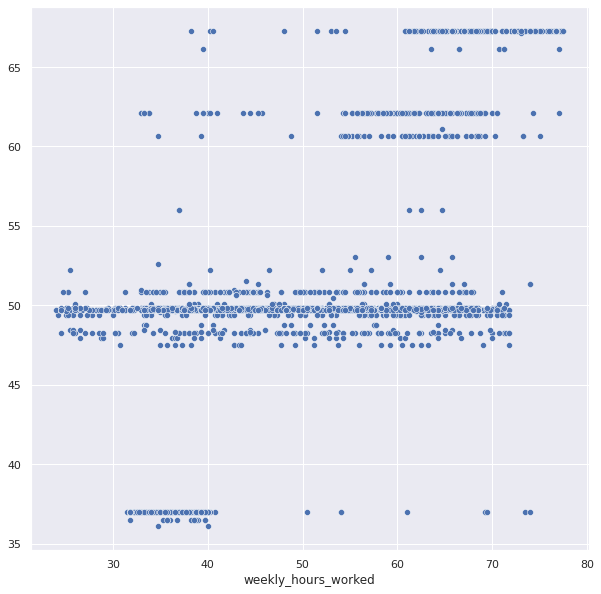

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test['weekly_hours_worked_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='weekly_hours_worked',
    y='weekly_hours_worked_pred',
    color=alt.Color('salary', scale=alt.Scale(scheme='category10')),
    tooltip=['salary','churn','department']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

     |████████████████████████████████| 8.9MB 4.0MB/s 
     |████████████████████████████████| 2.2MB 45.5MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.3-cp36-none-any.whl size=9296309 sha256=a99cc7115f997c81de58e90511c9491aedd9863421ae379d67fd1058de91507a
  Stored in directory: /root/.cache/pip/wheels/dc/96/7b/9c9d48ed392511bc708e39580e18dc7a92f475795cd26b51bf
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

NameError: ignored

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653154

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.03651083062621142

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [ ]:
nx.overall_reciprocity(G_friendship)

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

In [ ]:
# Your solutions here...

## Network analysis: Case Study 2 in 2-Mode Networks: Exploring Instagram Hashtag Networks

In this notebook, we will collect data from Instagram to construct (snowball) a network of hashtags as well as a (2-mode) bipartite network of Instagram users and hashtags.

The networks in this example can be considered synthetic, since nodes and particularly edges represent virtual constructs rather than explicit connections.


In this case we explore

- Graph construction (normal and bipartite)
- Calculation of centrality indicators 
- Community detection
- Projection of bipartite network

Furthermore you will learn:

- to make simple (public) API requests (API: Application Programming Interface) 
- parse json response
- perform simple string manipulation/text-mining to extract features of interest (Transition into NLP)

### So what?

Such an analysis can be useful in marketing to identify sub-dicussions in a niche or related to a brand. We will detect popular hashtags within sub-niches that "correlate" with a topic of interest.
Furthermore, we will identify accounts with high engagement (post-counts) within specific hashtag communities.

Unfortunately Instagram, very recently (few days back), diesabled a simple public API that allowed to map usernames form user-ids. Therefore, we will use ```instaloader```, a module for interacting with Instagram. 

We will only use public data that does not require log-in. If you want to explore other graph structures on Instagram (e.g. follow-networks), have a look at Instabot.

### Tooling Setup

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx
import community

from nltk.tokenize import TweetTokenizer # A bit of a transition into NLP. The tweet tokenizer from the NLTK library will help us extract the hashtags from post-text
tknzr = TweetTokenizer()
import requests as rq # The requests library handles "requests" to APIs similar to a browser that requests a webpage given a URL
from networkx.algorithms import bipartite # bipartite NW algos

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

### Getting the data

In [ ]:
# Defining global constants for the instagram extract

# Note: These things may change without a warning...

# Instagram base url preffix
tagurl_prefix = 'https://www.instagram.com/explore/tags/'

# suffix to append to tag request url to retrieve data in JSON format
tagurl_suffix = '/?__a=1'

# suffix to end cursor when requesting posts by tag
tagurl_endcursor = '&max_id='

# a generic media post preffix (concat with media shortcode to view)
posturl_prefix = 'https://www.instagram.com/p/'

# target initial tags (we will run this with only one tag but the code can take multiple - just extend the list)
tags = ['machinelearning']

In [ ]:
# urls to initial tags using the above url-components
queries = [ tagurl_prefix + tag + tagurl_suffix for tag in tags ]

The response structure of this Insta endpoint is not really straightforward. You can read more about it in the original post.
The data is most likely composed on request by some large-scale graph database at returned. Instagram obviously assumes that the receiving site is a browser exploring public posts.

We also don't get all posts for some hashtag right away but a "page" ~25 posts.

To receive further posts, we need to pass a new requests specifying "our position" by providing an end_cursor.

This **end cursor** can be found in

```
response['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
```

#### Some thoughts on JSON

This brings us to JSON. Think of JSON objects as of combinations of dictionaries and lists that can contain most Python objects (e.g. lists, dictionaries, tuples, strings, ints etc.) that can be represented as text. Once parsed you can operate JSON objects just as any other dictionary or list in Python.
More about JSON - here:

In [ ]:
edges = []
for q in queries:    
    for i in range(10): # how many iterations/deepth ?
        r = rq.get(q).json()
        end_cursor = r['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
        edges.extend(r['graphql']['hashtag']['edge_hashtag_to_media']['edges'])
        print(i)
        q = q + tagurl_endcursor + end_cursor

### Bringing the collected data into useful format...

In the next step we will take the rich raw posts data and extract only the information that we need for our analysis. We will just cut out owner-id (account that posted), a shortcode that we can use to identify the post and get more data on it in future if needed, and the text including the hashtags.

To make things more compact we not only extract the raw data but we also preprocess a bit.

The hashtags are incorporated within the post-text. Therefore, we pass the text of each post through a tokenizer, that identifies individual words and elements (such as emoji). We use the tweet-tokenizer from the NLTK library, which is made for working with social media data.

```
  tokens = tknzr.tokenize(text)
  tags = [x.strip('#') for x in tokens if x.startswith('#')]
```

The first line turns the text of the post in a list of tokens (words & co.). The second line picks out only the elements that start with a "#" and strips the "#" when adding them to a list.

Then we construct a dictionary with these values and append it to a list.

This gives us a list of dicitonaries - something that we can pass to Pandas to get a dataframe we can work with.

In [ ]:
post_dicts = [] #empty list

for post in edges: #iterate all raw posts

    if post['node']['edge_media_to_caption']['edges'] == []: # hop to the next if no text in the post
        continue

    post_dict = {} # empty dictionary
    id_owner = post['node']['owner']['id'] # pick out user-id
    shortcode = post['node']['shortcode'] # pick out short post identifier
    text = post['node']['edge_media_to_caption']['edges'][0]['node']['text'] # pick out post text

    # Pick hashtags from text
    tokens = tknzr.tokenize(text)
    tags = [x.strip('#') for x in tokens if x.startswith('#')]

    # fill in dictionary with values
    post_dict['id_owner'] = id_owner
    post_dict['shortcode'] = shortcode
    post_dict['tags'] = tags
    post_dict['text'] = text

    post_dicts.append(post_dict) #append the dictionary to a list of post-dictionaries

NameError: ignored

In [ ]:
# Create DF
posts_df = pd.DataFrame(post_dicts)

# Remove hashtags that are not a hashtag (emptyspace & mistakes)
posts_df['tags'] = posts_df['tags'].map(lambda t: [x for x in t if x.isalnum()])

# Kick out posts with 0 hashtags
posts_df = posts_df[posts_df['tags'].map(len) != 0]

KeyError: ignored

### Simple stats

In [ ]:
# People with most posts (no names though)
posts_df['id_owner'].value_counts()

### Creating a graph

In [ ]:
# Create empty undirected Graph
G = nx.Graph()

We will construct the graph from hashtag combinations of each post. We will use `itertools.combinations` for that. Given a list of n objects this will create all possible unique combinations of size k (which we set to 2). Note, that we can build up the Graph sequentially. An edgelist contains all data we need.

In [ ]:
# Create the graph
for i in posts_df['tags']:
    G.add_edges_from(list(itertools.combinations(i,2)))

### Preprocessing the Graph

It can be a good idea to filter the Graph before analysing. For instance, we can remove all hashtags with low degree-centrality. This can be interpreted as - kicking out made up hashtags or extremely underused ones. We will calculate a percentile threshold and exclude everything under it.

In [ ]:
# Calculating degree centrality for the Graph
degree_centrality = nx.degree_centrality(G)

In [ ]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 20)

In [ ]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

### Analysing the Graph

Now we are going to calculate some network indicators and once done, we will export a DataFrame analyse them further.

In [ ]:
# Recalculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [ ]:
# Same for Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')

In [ ]:
# Same for community detection
communities = community.best_partition(G, resolution = 1)
nx.set_node_attributes(G, communities, 'community')

In [ ]:
graph_df = pd.DataFrame(dict(G.nodes(data=True))).T

In [ ]:
graph_df['community'].value_counts(normalize=True)

In [ ]:
# Find the 5 most popular hashtags for each identified community
tag_per_com = graph_df.groupby('community')['degree'].nlargest(5)

In [ ]:
tag_per_com[0]

### Bipartite graph between users and hashtags

Can we identify communities of users given their usage of hashtags?

In [ ]:
# Create a new graph
B = nx.Graph()

In [ ]:
# we will take the same data
posts_df.head()

In [ ]:
# We need to specify the nodes for level 0 - this will be our users
B.add_nodes_from(list(set(posts_df.id_owner)), bipartite=0)

In [ ]:
# Then we need to add hashtags nodes as level 1 nodes
B.add_nodes_from(list(set(itertools.chain(*posts_df.tags))), bipartite=1)

In [ ]:
# This quick loop will generate edges between users and hashtags
# Every time someone mentions a #hashtag, a link is created

bi_edges = []
for i in posts_df[['id_owner','tags']].iterrows(): # we do this row-by-row since each row is a post
    id_owner = i[1]['id_owner']
    for j in i[1]['tags']:
        bi_edges.append((id_owner, j)) # edges are appended to a list as a tuple (id_owner, hashtag)

In [ ]:
# Let's add the edges to our graph
B.add_edges_from(bi_edges)

In the next step we will project the graph onto the account-level. For this we need to get the nodesets of the 0 level. We also calculate the level 1 level (just because)

In [ ]:
# Extract a set of nodes with level 0
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}

# the remaining nodes are then level 1
bottom_nodes = set(B) - top_nodes

In [ ]:
# Let's project this graph using a weighted projection
G_proj = bipartite.weighted_projected_graph(B, top_nodes)

In [ ]:
# Again, we can identify communities
bi_communities = community.best_partition(G_proj, resolution = 1)
nx.set_node_attributes(G_proj, bi_communities, 'community')

In [ ]:
# Calculate eigenvector centrality and set it as an attribute
bi_eigenvector = nx.eigenvector_centrality(G_proj)
nx.set_node_attributes(G_proj, bi_eigenvector, 'eigenvector_centrality')

In [ ]:
# Create a new attribute "activity" - or propensity to spam
nx.set_node_attributes(G_proj, dict(posts_df.id_owner.value_counts()), 'activity' )

In [ ]:
# Do spammers connect more in terms of spamming about the same stuff?
print(nx.numeric_assortativity_coefficient(G_proj,'activity'))

In [ ]:
graph_proj_df = pd.DataFrame(dict(G_proj.nodes(data=True))).T

In [ ]:
graph_proj_df.head()

In [ ]:
# Find the 5 most central for each identified community
user_per_com = graph_proj_df.groupby('community')['eigenvector_centrality'].nlargest(5)

In [ ]:
user_per_com

### The assignment

Basically, try to repeat the exercise on your own with a term of your choice. 

1. Just run the code from before, where you replace 'machinelearning' with whatever discussion you are interested to map.
2. Create the query link as in the notebook.
3. Since the instaloader is not working at the moment (seems to be blocked), you have to click on the query link to get the output in your web-browser. C&P it then, and save it in a text file (something like the text editor. that saves unformatted text.)
4. Now you can analyse the  instagram network.

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 14.8MB 326kB/s 
     |████████████████████████████████| 6.5MB 53.7MB/s 
     |████████████████████████████████| 18.3MB 1.3MB/s 
     |████████████████████████████████| 1.6MB 4.2MB/s 


In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-06 14:32:30--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-06 14:32:31--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.07s   

2020

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Load the data

stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [ ]:
stoejdata.head()

DATAEJER  VEJBESTYRE  ...  GNSHAST222                        geometry
0      316       316.0  ...        50.7  POINT (666785.000 6174847.000)
1      316       316.0  ...        61.0  POINT (650362.000 6165481.000)
2      316       316.0  ...        39.6  POINT (670888.000 6165624.000)
3      316       316.0  ...        74.1  POINT (675622.000 6167385.000)
4      316       316.0  ...        58.7  POINT (668085.000 6163679.000)

[5 rows x 36 columns]

In [ ]:
print(stoejdata.columns)

Index(['DATAEJER', 'VEJBESTYRE', 'VEJNR', 'VEJDEL', 'VEJNAVN', 'KILOMETER',
       'METER', 'LOKATION', 'KOMMUNE', 'AAR', 'AADT', 'TIMEANTAL0',
       'TIMEANTAL1', 'TIMEANTAL2', 'GNSHAST07_', 'GNSHAST19_', 'GNSHAST22_',
       'TIMEANTAL3', 'TIMEANTAL4', 'TIMEANTAL5', 'GNSHAST070', 'GNSHAST190',
       'GNSHAST220', 'TIMEANTAL6', 'TIMEANTAL7', 'TIMEANTAL8', 'GNSHAST071',
       'GNSHAST191', 'GNSHAST221', 'TIMEANTAL9', 'TIMEANTA10', 'TIMEANTA11',
       'GNSHAST072', 'GNSHAST192', 'GNSHAST222', 'geometry'],
      dtype='object')


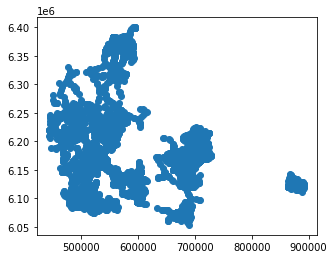

In [ ]:
stoejdata.plot()

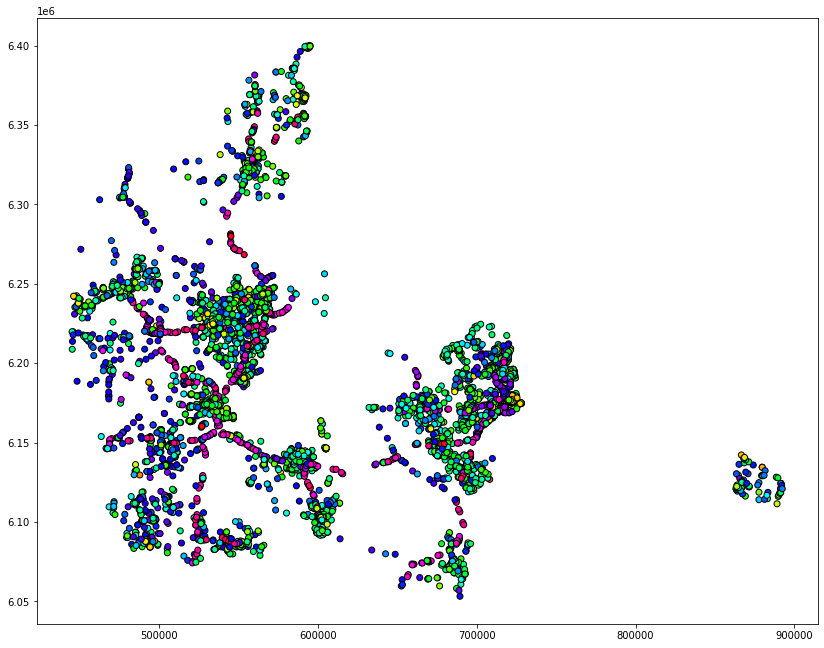

In [ ]:
stoejdata.plot(cmap='hsv', edgecolor='black', column='GNSHAST071', figsize=(14,14))

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

--2020-12-06 14:34:09--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip [following]
--2020-12-06 14:34:09--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip’

shapefiles.zip      100%[===================>]  31.21M  56.5MB/s    in 0.6s    

2020-12-06 14:34:10 (56.5 MB/s) - ‘shap

In [ ]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

In [ ]:
municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

FEAT_ID  ...                                           geometry
0   149673  ...  POLYGON Z ((675926.480 6172129.210 -999.000, 6...
1   149674  ...  POLYGON Z ((687523.890 6176458.950 -999.000, 6...
2   149675  ...  POLYGON Z ((689361.510 6173523.720 -999.000, 6...
3   149676  ...  POLYGON Z ((689210.210 6174589.210 -999.000, 6...
4   149647  ...  POLYGON Z ((679613.660 6187623.990 -999.000, 6...

[5 rows x 25 columns]

So we can explore the geographical data the way we normally do - when working with geography, this table can sometimes be refered to as an "attribute table" but it is just that; a normal table that is connected to geographical data.

The full set of columns is:

In [ ]:
print(municipalities.columns)

Index(['FEAT_ID', 'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT', 'GEOM_STTXT',
       'DAGI_ID', 'AREAL', 'REGIONKODE', 'REGIONNAVN', 'GYLDIG_FRA',
       'GYLDIG_TIL', 'KOMKODE', 'KOMNAVN', 'DQ_SPECIFK', 'DQ_STATEM',
       'DQ_DESCR', 'DQ_PROCESS', 'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV',
       'TIMEOF_CRE', 'TIMEOF_PUB', 'TIMEOF_REV', 'TIMEOF_EXP', 'geometry'],
      dtype='object')


In [ ]:
mun['KOMKODE'].astype('float')

KOMNAVN
Aabenraa           580.0
Aalborg            851.0
Aarhus             751.0
Albertslund        165.0
Allerød            201.0
                   ...  
Vejle              630.0
Vesthimmerlands    820.0
Viborg             791.0
Vordingborg        390.0
Ærø                492.0
Name: KOMKODE, Length: 99, dtype: float64

In [ ]:
mun['KOMKODE'] = mun['KOMKODE'].astype('float')

In [ ]:
mun = municipalities.dissolve(by='KOMNAVN')

In [ ]:
stoejdata_select = stoejdata.loc[:, ['KOMMUNE', 'GNSHAST071']]
stoejdata_grouped = stoejdata_select.groupby(['KOMMUNE'])
stoejdata_grouped = stoejdata_grouped.mean().reset_index()
stoejdata_grouped.head()

KOMMUNE  GNSHAST071
0      0.0   72.907692
1    101.0   31.097826
2    147.0   30.845000
3    151.0   72.583333
4    153.0   92.830769

In [ ]:
stoejdata_grouped.mean()

KOMMUNE       457.329897
GNSHAST071     69.918546
dtype: float64

In [ ]:
data_merged = mun.merge(stoejdata_grouped, left_on='KOMKODE', right_on='KOMMUNE', how='left', validate = 'one_to_one')
data_merged.head()

geometry  ...  GNSHAST071
0  MULTIPOLYGON Z (((532611.300 6079233.260 -999....  ...   80.434694
1  MULTIPOLYGON Z (((577131.740 6306752.540 -999....  ...   51.842678
2  MULTIPOLYGON Z (((580132.510 6230146.780 -999....  ...   87.732143
3  POLYGON Z ((711377.280 6178342.550 -999.000, 7...  ...   49.565957
4  POLYGON Z ((701094.650 6192181.200 -999.000, 7...  ...   44.873134

[5 rows x 26 columns]

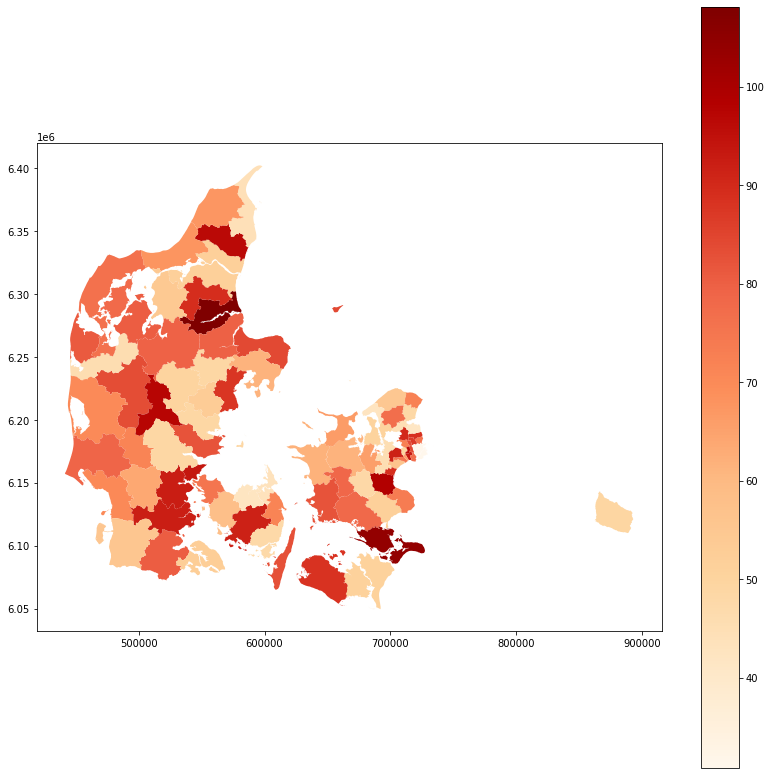

In [ ]:
data_merged.plot(column="GNSHAST071", legend="True", figsize=(14,14), cmap='OrRd')

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [ ]:
!pip -q install eli5 #installing a great package for explaining ML models

     |████████████████████████████████| 112kB 5.5MB/s 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [ ]:
data.head()

0     1
0  I was thrilled to be back in the Great city of...  True
1  The Unsolicited Mail In Ballot Scam is a major...  True
2  As long as I am President, I will always stand...  True
3  Our Economy is doing great, and is ready to se...  True
4  If I do not sound like a typical Washington po...  True

In [ ]:
# some basic text cleaning, removing HTML fragments (only a problem here)

import re

pattern = re.compile('<br /><br />')

print(data[0].iloc[3])
print(pattern.subn(' ', data[0].iloc[3])[0])

Our Economy is doing great, and is ready to set new records - best ever (Again!).
Our Economy is doing great, and is ready to set new records - best ever (Again!).


In [ ]:
# application of the cleaning mask to everthing

data[0] = data[0].apply(lambda text: pattern.subn(' ', text)[0])
data[0] = data[0].apply(lambda text: pattern.subn(' ', text)[0])

## Approach 1 - Sklearn
If you don't want to deal with language or much code you can just do that

In [ ]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

In [ ]:
# define in and outputs

X = data[0].values
y = data[1].values

In [ ]:
# Split the data in 80% trainig 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [ ]:
# Simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [ ]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.8059701492537313

In [ ]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)

In [ ]:
# confusion matrix by hand... :-)

pd.crosstab(y_test, y_pred)

col_0  False  True 
row_0              
False   1180    309
True     263   1196

In [ ]:
# Or TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.8171641791044776

In [ ]:
import eli5
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','positive'], top=20)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_test[0]

'Gov Kasich voted for NAFTA, which devastated Ohio and is now pushing TPP hard- bad for American workers!'

In [ ]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['negative','positive'])

In [ ]:
preds_array = model.predict_proba(X_test_vec_2)

In [ ]:
preds_array[:,1]

array([0.67935772, 0.75608666, 0.13428755, ..., 0.34302019, 0.67398903,
       0.83636925])

In [ ]:
predsDF = pd.DataFrame({'text':X_test, 'pred_pos':preds_array[:,1], 'y_test':y_test})

In [ ]:
predsDF['diff_error'] =  predsDF.pred_pos - predsDF.y_test

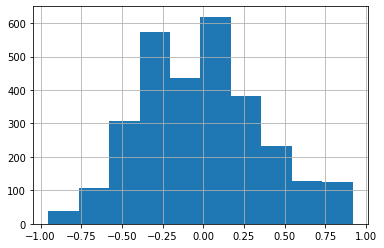

In [ ]:
predsDF.diff_error.hist()

In [ ]:
predsDF.sort_values('diff_error', ascending=True).iloc[0,0]

'To all of the great people who are working so hard for your Country and not getting paid I say, THANK YOU - YOU ARE GREAT PATRIOTS!'

In [ ]:
# Let's fire up spacy

import spacy

# and load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

# find more models for other languages here: https://spacy.io/models/

In [ ]:
X_test[1]

'Texas LC George P. Bush backed me when it wasn’t the politically correct thing to do, and I back him now.'

In [ ]:
doc = nlp(X_test[1])

Spacy docs have POS (part of speech) and ENT (entity anotation) - let's see how we can use that to filter (bootstrap) a nice dictionary for future use.

In [ ]:
# let's look at the POS tags
[(tok.text, tok.pos_) for tok in doc]

[('Texas', 'PROPN'),
 ('LC', 'PROPN'),
 ('George', 'PROPN'),
 ('P.', 'PROPN'),
 ('Bush', 'PROPN'),
 ('backed', 'VERB'),
 ('me', 'PRON'),
 ('when', 'ADV'),
 ('it', 'PRON'),
 ('was', 'AUX'),
 ('n’t', 'PART'),
 ('the', 'DET'),
 ('politically', 'ADV'),
 ('correct', 'ADJ'),
 ('thing', 'NOUN'),
 ('to', 'PART'),
 ('do', 'AUX'),
 (',', 'PUNCT'),
 ('and', 'CCONJ'),
 ('I', 'PRON'),
 ('back', 'VERB'),
 ('him', 'PRON'),
 ('now', 'ADV'),
 ('.', 'PUNCT')]

In [ ]:
# Let's tokenize the first 2000 articles (that should take around 1 minute with this approach)
tokenlist = []
for doc in nlp.pipe(X_train[:2000]):
  tokens =[tok.text.lower() for tok in doc if tok.pos_ in ['NOUN','ADJ','ADV','VERB'] and not tok.is_stop]
  tokenlist.append(tokens)

In [ ]:
from gensim.corpora.dictionary import Dictionary

In [ ]:
dictionary = Dictionary(tokenlist)

In [ ]:
len(dictionary)

3654

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [ ]:
len(dictionary)

726

In [ ]:
vectorizer = TfidfVectorizer(vocabulary=list(dictionary.values()))
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test_vec_2 = vectorizer.fit_transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.7242198100407056

In [ ]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','positive'], top=20)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier

tfidf = TfidfVectorizer(vocabulary=list(dictionary.values()))
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
clf = MLPClassifier(verbose=False)


pipe = make_pipeline(tfidf, svd, clf)

pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rat

In [ ]:
pipe.score(X_test, y_test)

0.7313432835820896

In [ ]:
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(X_test[0], pipe.predict_proba)
te.show_prediction(target_names=['negative','positive'])

## Semantic search

Once you obtain dense vectors that represent your text you can calculate distance measures. Where distance is not high, you will probably find texts that are semantically similar... :-)

This can be done by calculating all distances in the corpus (which would be rather inefficient) or by using nearest-neighbor approximation.

We will be using Annoy, a popular technique for finding neighbors developed at spotify (to find similar songs)
https://github.com/spotify/annoy


In [ ]:
!pip install annoy

     |████████████████████████████████| 655kB 5.9MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp36-cp36m-linux_x86_64.whl size=390365 sha256=c15096ace864ea31b379a55f613667d60cb3ed7e922cf733cbf0e26fa0de9b3f
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


Let's first vectorise our texts. For this we will be using Gensim, as it provides a more language-oriented approach as well as a good interlude into topic modelling...

In [ ]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

# Import the TfidfModel from Gensim
from gensim.models.tfidfmodel import TfidfModel

# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

# Tooling to map between corpus (gensim) and matrix - more general
from gensim.matutils import corpus2csc, corpus2dense

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Generate a dictionary and filter
dictionary = Dictionary(tokenlist)
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [ ]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in data[0]]

In [ ]:
# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [ ]:
# transform corpus to TFIDF
corpus_tfidf = tfidf[corpus]

In [ ]:
# Training the LSI model
model_lsi = LsiModel(corpus_tfidf, num_topics = 300, id2word=dictionary)

In [ ]:
# Generating the corpus train & test

corpus_lsi = model_lsi[corpus_tfidf]

In [ ]:
# turn into matrix
corpus_lsi_matrix = corpus2dense(corpus_lsi, 300 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [ ]:
corpus_lsi_matrix.shape

(300, 14736)

In [ ]:
corpus_lsi_matrix = corpus_lsi_matrix.T

In [ ]:
from annoy import AnnoyIndex

In [ ]:
f = 300

t = AnnoyIndex(f, 'angular')  # Length of item vector that will be indexed

for i in range(len(corpus_lsi_matrix)):
    t.add_item(i, corpus_lsi_matrix[i])

In [ ]:
t.build(10)

True

In [ ]:
t.get_nns_by_item(0, 10)

[0, 9509, 5477, 8947, 8686, 9861, 4122, 3629, 2808, 13145]

In [ ]:
data[0][0]

'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST!'

In [ ]:
data[0][t.get_nns_by_item(0, 10)]

0        I was thrilled to be back in the Great city of...
9509     I know what it means to be American, and that ...
5477     The radical left tolerates no dissent, it perm...
8947     Their agenda is a disaster for our great Ameri...
8686     ” But the King is not there to deliver the U.S...
9861     Not fair to the American Worker and to the har...
4122     My deepest sympathies and respect go out to th...
3629     ....However, out of respect for the Bush Famil...
2808     Even Usain Bolt from Jamaica, one of the great...
13145    , “The White House has become a “grapetted mes...
Name: 0, dtype: object

Let's first vectorise our texts. For this we will be using Gensim, as it provides a more language-oriented approach as well as a good interlude into topic modelling...

In [ ]:
# Your solutions from here...

In [ ]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [ ]:
# Training the model
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)

In [ ]:
# Check out topics
lda_model.print_topics(-1)

[(0,
  '0.027*"datum" + 0.017*"service" + 0.016*"-" + 0.013*"research" + 0.011*"european" + 0.011*"data" + 0.009*"application" + 0.009*"science" + 0.009*"platform" + 0.008*"public"'),
 (1,
  '0.037*"child" + 0.033*"human" + 0.019*"study" + 0.016*"change" + 0.013*"language" + 0.013*"social" + 0.011*"analysis" + 0.011*"communication" + 0.011*"interaction" + 0.010*"concept"'),
 (2,
  '0.024*"disease" + 0.023*"patient" + 0.023*"clinical" + 0.014*"care" + 0.014*"health" + 0.013*"system" + 0.013*"treatment" + 0.011*"study" + 0.011*"cell" + 0.011*"model"'),
 (3,
  '0.037*"energy" + 0.015*"people" + 0.015*"user" + 0.014*"%" + 0.014*"plan" + 0.014*"building" + 0.012*"market" + 0.011*"cost" + 0.011*"phase" + 0.010*"business"'),
 (4,
  '0.024*"sme" + 0.024*"innovation" + 0.017*"food" + 0.015*"market" + 0.014*"eu" + 0.014*"service" + 0.011*"phase" + 0.011*"management" + 0.011*"business" + 0.011*"product"'),
 (5,
  '0.022*"system" + 0.020*"market" + 0.016*"process" + 0.016*"technology" + 0.014*"ene

In [ ]:
# Where does a text belong to?
lda_model[corpus][0]

[(7, 0.112362), (9, 0.8148995)]

In [ ]:
data[0][0]

'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST!'

In [ ]:
# Let's try to visualize
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)


NameError: ignored

In [ ]:
# Let's Visualize
pyLDAvis.display(lda_display)

NameError: ignored

In [ ]:
# In case you run a website and want to publish it...or embed it in a blogpost...
pyLDAvis.save_html(lda_display, 'lda.html')

In [ ]:
# And that's how you get the topic-number that's ranked highest

print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1]))
print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1])[0][0])

[(9, 0.8610384), (2, 0.121567)]
9
